In [21]:
import os 
import glob
import re
import numpy as np
from datasets import *
import pandas as pd 
import transformers
import torch 
import tensorflow as tf
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import DistilBertTokenizer

ImportError: cannot import name 'LayerNormalization' from 'tensorflow.python.keras.layers.normalization' (D:\anaconda3\lib\site-packages\tensorflow\python\keras\layers\normalization\__init__.py)

In [85]:
from sklearn.model_selection import train_test_split

In [3]:
! dir

 Le volume dans le lecteur D n'a pas de nom.
 Le num‚ro de s‚rie du volume est 7A4F-41D4

 R‚pertoire de D:\5A-Centrale\Challenge_medical\git\challenge-ia-sante

25/01/2022  01:29    <DIR>          .
25/01/2022  01:29    <DIR>          ..
24/01/2022  15:59    <DIR>          .ipynb_checkpoints
25/01/2022  01:29           123ÿ975 Assertions.ipynb
25/01/2022  01:23            44ÿ561 Code.ipynb
24/01/2022  19:25           133ÿ883 Code_draft.ipynb
24/01/2022  15:57    <DIR>          Health data challenge
24/01/2022  15:57               343 README.md
25/01/2022  00:12         9ÿ213ÿ046 Untitled.ipynb
               5 fichier(s)        9ÿ515ÿ808 octets
               4 R‚p(s)  133ÿ746ÿ913ÿ280 octets libres


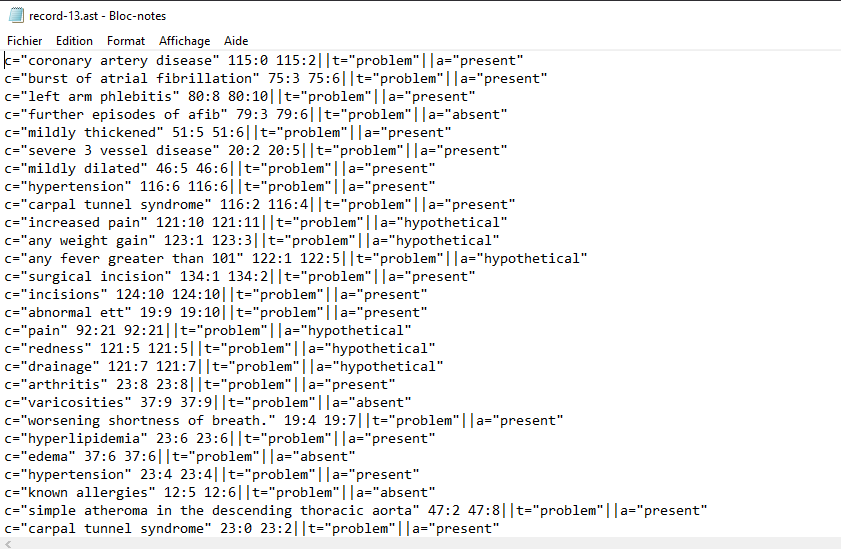

## Validation Dataset

In [33]:
txt_file = []

for i in glob.glob("./Health data challenge/val_data/txt/*.txt"):
    print(i)
    txt_file.append(i[:-3])
txt_file

./Health data challenge/val_data/txt\0006.txt
./Health data challenge/val_data/txt\0013.txt
./Health data challenge/val_data/txt\0017.txt
./Health data challenge/val_data/txt\0018.txt
./Health data challenge/val_data/txt\0022.txt
./Health data challenge/val_data/txt\0025.txt
./Health data challenge/val_data/txt\0030.txt
./Health data challenge/val_data/txt\0033.txt
./Health data challenge/val_data/txt\0034.txt
./Health data challenge/val_data/txt\0038.txt
./Health data challenge/val_data/txt\0041.txt
./Health data challenge/val_data/txt\0045.txt
./Health data challenge/val_data/txt\0049.txt
./Health data challenge/val_data/txt\0053.txt
./Health data challenge/val_data/txt\0061.txt
./Health data challenge/val_data/txt\0065.txt
./Health data challenge/val_data/txt\0066.txt
./Health data challenge/val_data/txt\0069.txt
./Health data challenge/val_data/txt\0070.txt
./Health data challenge/val_data/txt\0077.txt
./Health data challenge/val_data/txt\0082.txt
./Health data challenge/val_data/t

['./Health data challenge/val_data/txt\\0006.',
 './Health data challenge/val_data/txt\\0013.',
 './Health data challenge/val_data/txt\\0017.',
 './Health data challenge/val_data/txt\\0018.',
 './Health data challenge/val_data/txt\\0022.',
 './Health data challenge/val_data/txt\\0025.',
 './Health data challenge/val_data/txt\\0030.',
 './Health data challenge/val_data/txt\\0033.',
 './Health data challenge/val_data/txt\\0034.',
 './Health data challenge/val_data/txt\\0038.',
 './Health data challenge/val_data/txt\\0041.',
 './Health data challenge/val_data/txt\\0045.',
 './Health data challenge/val_data/txt\\0049.',
 './Health data challenge/val_data/txt\\0053.',
 './Health data challenge/val_data/txt\\0061.',
 './Health data challenge/val_data/txt\\0065.',
 './Health data challenge/val_data/txt\\0066.',
 './Health data challenge/val_data/txt\\0069.',
 './Health data challenge/val_data/txt\\0070.',
 './Health data challenge/val_data/txt\\0077.',
 './Health data challenge/val_data/txt\\

In [27]:
txt_file = []

for i in glob.glob("./Health data challenge/val_data/txt/*.txt"):
    txt_file.append(i[44:])
    
phrases_text_ast = []
word_list = []
text_ast = []
label = []
phrases_text = []
merged_phrases_text = []
val_dict = {"text" : [], "label" : []}

for file_ in txt_file:


    for i in open("./Health data challenge/val_data/beth/txt/" + file_[:-3]+"txt"):
        phrases_text.append(i[:-1])

    #merged_phrases_text = np.empty(len(phrases_text), dtype=str)

    for i in range(len(phrases_text)): 
        if("." not in phrases_text[i]):
            # texte qui n as pas de points fusioner
            merged_phrases_text.append(' '.join(phrases_text[i:i+2]))
            #print(phrases_text[i-1],phrases_text[i],phrases_text[i+1] )
            #pour éviter les répétitions
            i = i + 2
        else : merged_phrases_text.append(phrases_text[i])

    for i in range(len(text_ast)): 
        for j in range(len(merged_phrases_text)):
            if text_ast[i] in merged_phrases_text[j]:
               # print(text_ast[i], merged_phrases_text[j])
                #print('------\n')
                val_dict["text"].append(merged_phrases_text[j])
                val_dict["label"].append(label[i])



In [28]:
len(val_dict["text"])

0


## Test dataset
Labels for ast 
present, absent, possible, associated_with_someone_else, conditional, hypothetical

In [23]:
txt_file = []

for i in glob.glob("./Health data challenge/train_data/beth/txt/*.txt"):
    txt_file.append(i[44:])
    
phrases_text_ast = []
word_list = []
text_ast = []
label = []
phrases_text = []
merged_phrases_text = []
train_dict = {"text" : [], "label" : []}
merge_phrases_indices = []
ast_file = "record-29.ast"
for file_ in txt_file:
    phrases_text_ast = []
    word_list = []
    text_ast = []
    label = []
    phrases_text = []
    merged_phrases_text = []
    for i in open("./Health data challenge/train_data/beth/ast/"+ file_[:-3]+"ast"):
        phrases_text_ast.append(i[:-1])
    for i in phrases_text_ast:
        text_ast.append(i.split('\"')[1])
        label.append(i.split('\"')[-2] )

    for i in open("./Health data challenge/train_data/beth/txt/" + file_[:-3]+"txt"):
        phrases_text.append(i[:-1])

    #merged_phrases_text = np.empty(len(phrases_text), dtype=str)

    for i in range(len(phrases_text)): 
        if("." not in phrases_text[i]):
            # texte qui n as pas de points fusioner
            merged_phrases_text.append(' '.join(phrases_text[i:i+2]))
            #print(phrases_text[i-1],phrases_text[i],phrases_text[i+1] )
            #pour éviter les répétitions, indices du futures tableau à supprimer pour les doublons
            i = i + 2
            merge_phrases_indices.append(i+1)
        else : merged_phrases_text.append(phrases_text[i])

    for i in range(len(text_ast)): 
        for j in range(len(merged_phrases_text)):
            if text_ast[i] in merged_phrases_text[j]:
               # print(text_ast[i], merged_phrases_text[j])
                #print('------\n')
                train_dict["text"].append(merged_phrases_text[j])
                train_dict["label"].append(label[i])


In [7]:
len(train_dict["text"])
#charactèe spéciaux à enlever : , . # / () Majuscules @ : & % - *

7460

In [24]:
merge_phrases_indices

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 38,
 40,
 41,
 42,
 44,
 46,
 48,
 49,
 50,
 52,
 60,
 65,
 66,
 67,
 68,
 97,
 103,
 104,
 113,
 114,
 115,
 116,
 118,
 119,
 121,
 122,
 124,
 125,
 127,
 128,
 131,
 133,
 134,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 154,
 155,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 67,
 70,
 71,
 73,
 78,
 80,
 81,
 83,
 85,
 88,
 92,
 94,
 95,
 99,
 101,
 117,
 126,
 131,
 132,
 133,
 134,
 135,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 161,
 163,
 164,
 165,
 166,
 168,
 169,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 22,
 23,
 25,
 44,
 55,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 90,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 10

'had subsequent abnormal stress test and pefusion imaging showed ef 38  with perfusion defects  '

In [8]:
train_df = pd.DataFrame(train_dict)
#lower case
train_df['text'] = train_df['text'].apply(lambda a: " ".join(a.lower() for a in a.split()))
# enlever les charactères spéciaux 
train_df['text'] = train_df['text'].apply(lambda a: " ".join(re.sub(r'[\:\-\&\(\)\,\#\.\@\:\%\*\/\\]',' ', a) for a in a.split()))


In [9]:
print(train_df.loc[7458,'text'], train_df.loc[7458,'label'])

overall impression   this is a 54   year old man with significant coronary artery disease risk factors   positive family history   smoking history   hypertension and gender who presented with an st elevation mi status post lad stent   complicated by no residuals requiring nitroglycerin and diltiazem for good flow   present


In [10]:
train_df["label"].unique()

array(['present', 'absent', 'conditional', 'hypothetical', 'possible',
       'associated_with_someone_else'], dtype=object)

In [22]:
train_df

text    label  \
0     there has been interval improvement in left ba...  present   
1     history of present illness   61 yo african ame...  present   
2     61 yo african american hispanic male had abnor...  present   
3                 past medical history   ventral hernia  present   
4     ventral hernia htn elev  chol  right facial dr...  present   
...                                                 ...      ...   
7455  this is a 55   year old caucasian speaking mal...  present   
7456         past medical history   only hypertension    present   
7457                                only hypertension    present   
7458  overall impression   this is a 54   year old m...  present   
7459  this is a 54   year old man with significant c...  present   

                                         attention_mask  \
0         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3                              [1, 1, 1, 1, 1, 1, 1, 1]   
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
7455  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7456                           [1, 1, 1, 1, 1, 1, 1, 1]   
7457                                    [1, 1, 1, 1, 1]   
7458  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7459  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              input_ids  
0     [101, 2045, 2038, 2042, 13483, 7620, 1999, 218...  
1     [101, 2381, 1997, 2556, 7355, 6079, 10930, 306...  
2     [101, 6079, 10930, 3060, 2137, 6696, 3287, 201...  
3       [101, 2627, 2966, 2381, 23420, 2014, 6200, 102]  
4     [101, 23420, 2014, 6200, 1044, 2102, 2078, 344...  
...                                                 ...  
7455  [101, 2023, 2003, 1037, 4583, 2095, 2214, 2336...  
7456   [101, 2627, 2966, 2381, 2069, 23760, 29048, 102]  
7457                     [101, 2069, 23760, 29048, 102]  
7458  [101, 3452, 8605, 2023, 2003, 1037, 5139, 2095...  
7459  [101, 2023, 2003, 1037, 5139, 2095, 2214, 2158...  

[7460 rows x 4 columns]

## DistilBert Tokenizer

In [11]:
# load tokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [12]:
# test de tokenerisation sur une phrase
# words mappend to unique integers in the input_ids field
str_test = "Voici une phrase que je souhaite tokenizer"
to = tokenizer(str_test)
to

{'input_ids': [101, 29536, 28775, 16655, 7655, 10861, 15333, 2061, 27225, 4886, 2618, 19204, 17629, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
# convert_ids_to_tokens() to convert back input_ids to tokens
# CLS SEP : start and end of the sequence. 
tokens =  tokenizer.convert_ids_to_tokens(to.input_ids)
print(tokens,"\n")
## convert token to original string 
print(tokenizer.convert_tokens_to_string(tokens))
## size of vocabulary size  and model's  maximum context size 
print(tokenizer.vocab_size,  tokenizer.model_max_length)

['[CLS]', 'vo', '##ici', 'une', 'phrase', 'que', 'je', 'so', '##uh', '##ai', '##te', 'token', '##izer', '[SEP]'] 

[CLS] voici une phrase que je souhaite tokenizer [SEP]
30522 512


In [14]:
list_tokenized_text = [tokenizer(a) for a in train_df["text"] ]
input_ids = []
attention_mask = []
for i in list_tokenized_text:
    input_ids.append(i["input_ids"])
    attention_mask.append( i["attention_mask"])

In [70]:
labels_to_ids = {k: v for v, k in enumerate(['present','absent','conditional','hypothetical','possible','associated_with_someone_else'])}
print(labels_to_ids['present'])

0


In [15]:
train_df["attention_mask"] = attention_mask
train_df["input_ids"] = input_ids

In [76]:
label_to_id_col = []
for a in train_df["label"]:
    label_to_id_col.append(labels_to_ids[a])
train_df["label"] = label_to_id_col

In [78]:

import matplotlib.pyplot as plt

train_df["label"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

train, test = train_test_split(train_df, test_size=0.2, random_state=42, shuffle=True)
train_dataset = Dataset.from_pandas(train)
val_dataset = Dataset.from_pandas(test)

text  label  \
0     there has been interval improvement in left ba...      0   
1     history of present illness   61 yo african ame...      0   
2     61 yo african american hispanic male had abnor...      0   
3                 past medical history   ventral hernia      0   
4     ventral hernia htn elev  chol  right facial dr...      0   
...                                                 ...    ...   
7455  this is a 55   year old caucasian speaking mal...      0   
7456         past medical history   only hypertension        0   
7457                                only hypertension        0   
7458  overall impression   this is a 54   year old m...      0   
7459  this is a 54   year old man with significant c...      0   

                                         attention_mask  \
0         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   
1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3                              [1, 1, 1, 1, 1, 1, 1, 1]   
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
7455  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7456                           [1, 1, 1, 1, 1, 1, 1, 1]   
7457                                    [1, 1, 1, 1, 1]   
7458  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
7459  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   

                                              input_ids  
0     [101, 2045, 2038, 2042, 13483, 7620, 1999, 218...  
1     [101, 2381, 1997, 2556, 7355, 6079, 10930, 306...  
2     [101, 6079, 10930, 3060, 2137, 6696, 3287, 201...  
3       [101, 2627, 2966, 2381, 23420, 2014, 6200, 102]  
4     [101, 23420, 2014, 6200, 1044, 2102, 2078, 344...  
...                                                 ...  
7455  [101, 2023, 2003, 1037, 4583, 2095, 2214, 2336...  
7456   [101, 2627, 2966, 2381, 2069, 23760, 29048, 102]  
7457                     [101, 2069, 23760, 29048, 102]  
7458  [101, 3452, 8605, 2023, 2003, 1037, 5139, 2095...  
7459  [101, 2023, 2003, 1037, 5139, 2095, 2214, 2158...  

[7460 rows x 4 columns]

In [18]:
from transformers import AutoModelForSequenceClassification
device = "cpu"
num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [19]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [89]:
len(train_dataset)

5968

In [20]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(train_dataset) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
cannot import name 'LayerNormalization' from 'tensorflow.python.keras.layers.normalization' (D:\anaconda3\lib\site-packages\tensorflow\python\keras\layers\normalization\__init__.py)

In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=train_dataset,
                  eval_dataset=val_dataset,
                  tokenizer=tokenizer)
trainer.train();

In [ ]:
preds_output = trainer.predict(val_dataset)
print(preds_output.metrics)